# '커피빈' 데이터 이용한 커피 산업 분석

- 주문, 고객, 제품 데이터를 이용하여 커피 산업 분석
- 출처 : https://www.kaggle.com/datasets/saadharoon27/coffee-bean-sales-raw-dataset/
- 사용 데이터 : 주문, 고객, 제품 데이터
- 데이터 수 : 1000 rows × 19 columns

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import scatter
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, chi2_contingency

## 1. 데이터셋 불러오기

In [141]:
coffee_df = pd.ExcelFile('./Raw Data.xlsx')

order_df = pd.read_excel(coffee_df, 'orders')
customer_df = pd.read_excel(coffee_df, 'customers')
product_df = pd.read_excel(coffee_df, 'products')

In [142]:
order_df

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
customer_df

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No
...,...,...,...,...,...,...,...,...,...
995,43014-53743-XK,Jennica Tewelson,jtewelsonrn@samsung.com,+1 (469) 573-8379,4040 Hoard Junction,Dallas,United States,75210,No
996,62494-09113-RP,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No
997,10940-42739-ET,Etan Featenby,NaN,+1 (719) 416-9560,885 Toban Plaza,Colorado Springs,United States,80920,Yes
998,64965-78386-MY,Nicolina Jenny,njennyrq@bigcartel.com,+1 (562) 679-4750,6099 American Ash Court,Whittier,United States,90610,No


In [144]:
product_df

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375
5,A-M-0.5,Ara,M,0.5,6.750,1.3500,0.60750
6,A-M-1,Ara,M,1.0,11.250,1.1250,1.01250
7,A-M-2.5,Ara,M,2.5,25.875,1.0350,2.32875
8,A-D-0.2,Ara,D,0.2,2.985,1.4925,0.26865
9,A-D-0.5,Ara,D,0.5,5.970,1.1940,0.53730


## 2. 데이터 프레임 병합

In [145]:
# order_df에서 필요 없는 컬럼 제거
order_df.drop(['Customer Name', 'Email', 'Country', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price', 'Sales'], axis=1, inplace=True)

In [146]:
# order와 customer df 병합
coffee_df = pd.merge(order_df, customer_df, on='Customer ID', how='left')

# order, customer, product 병합
coffee_df = pd.merge(coffee_df, product_df, on='Product ID', how='left')

In [147]:
# 데이터프레임 확인
coffee_df

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Rob,M,1.0,9.950,0.9950,0.59700
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Exc,M,0.5,8.250,1.6500,0.90750
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes,Ara,L,1.0,12.950,1.2950,1.16550
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Exc,M,1.0,13.750,1.3750,1.51250
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Rob,L,2.5,27.485,1.0994,1.64910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,Jennica Tewelson,jtewelsonrn@samsung.com,+1 (469) 573-8379,4040 Hoard Junction,Dallas,United States,75210,No,Rob,L,2.5,27.485,1.0994,1.64910
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No,Rob,M,0.5,5.970,1.1940,0.35820
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No,Ara,M,0.5,6.750,1.3500,0.60750
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,Nicolina Jenny,njennyrq@bigcartel.com,+1 (562) 679-4750,6099 American Ash Court,Whittier,United States,90610,No,Ara,D,1.0,9.950,0.9950,0.89550


In [148]:
# 총 가격 컬럼 생성
coffee_df['Total Price'] = coffee_df['Unit Price'] * coffee_df['Quantity']

# 총 이윤 컬럼 생성
coffee_df['Total Profit'] = coffee_df['Profit'] * coffee_df['Quantity']

In [149]:
coffee_df

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,...,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total Price,Total Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,...,7505,Yes,Rob,M,1.0,9.950,0.9950,0.59700,19.900,1.19400
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,...,7505,Yes,Exc,M,0.5,8.250,1.6500,0.90750,41.250,4.53750
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,...,78205,Yes,Ara,L,1.0,12.950,1.2950,1.16550,12.950,1.16550
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,...,N41,No,Exc,M,1.0,13.750,1.3750,1.51250,27.500,3.02500
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,...,N41,No,Rob,L,2.5,27.485,1.0994,1.64910,54.970,3.29820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,Jennica Tewelson,jtewelsonrn@samsung.com,+1 (469) 573-8379,4040 Hoard Junction,Dallas,...,75210,No,Rob,L,2.5,27.485,1.0994,1.64910,27.485,1.64910
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,...,72905,No,Rob,M,0.5,5.970,1.1940,0.35820,29.850,1.79100
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,...,72905,No,Ara,M,0.5,6.750,1.3500,0.60750,27.000,2.43000
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,Nicolina Jenny,njennyrq@bigcartel.com,+1 (562) 679-4750,6099 American Ash Court,Whittier,...,90610,No,Ara,D,1.0,9.950,0.9950,0.89550,9.950,0.89550


## 3. 데이터 확인

### 3-1. 필요없는 컬럼 제거

In [150]:
coffee_df.columns

Index(['Order ID', 'Order Date', 'Customer ID', 'Product ID', 'Quantity',
       'Customer Name', 'Email', 'Phone Number', 'Address Line 1', 'City',
       'Country', 'Postcode', 'Loyalty Card', 'Coffee Type', 'Roast Type',
       'Size', 'Unit Price', 'Price per 100g', 'Profit', 'Total Price',
       'Total Profit'],
      dtype='object')

In [151]:
# 결측값 확인
coffee_df.isna().sum()

Order ID            0
Order Date          0
Customer ID         0
Product ID          0
Quantity            0
Customer Name       0
Email             206
Phone Number      135
Address Line 1      0
City                0
Country             0
Postcode            0
Loyalty Card        0
Coffee Type         0
Roast Type          0
Size                0
Unit Price          0
Price per 100g      0
Profit              0
Total Price         0
Total Profit        0
dtype: int64

- Email, Phone Number에서 결측값 확인
- 개인 정보 컬럼 : Customer Name, Email, Phone Number, Address Line 1, Postcode
- 개인 정보 데이터는 대체 하기도 어렵고 분석하기에 큰 의미가 없다 판단하에 삭제(Customer ID로 구별 가능)

In [152]:
# 분석에 무의미한 컬럼 제거
coffee_df.drop(['Customer Name','Email', 'Phone Number', 'Postcode', 'Address Line 1'], axis=1, inplace=True)

### 3-2. 데이터 확인

In [153]:
coffee_df

,Order ID,Order Date,Customer ID,Product ID,Quantity,City,Country,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total Price,Total Profit
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Paterson,United States,Yes,Rob,M,1.0,9.950,0.9950,0.59700,19.900,1.19400
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Paterson,United States,Yes,Exc,M,0.5,8.250,1.6500,0.90750,41.250,4.53750
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,San Antonio,United States,Yes,Ara,L,1.0,12.950,1.2950,1.16550,12.950,1.16550
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Cill Airne,Ireland,No,Exc,M,1.0,13.750,1.3750,1.51250,27.500,3.02500
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Cill Airne,Ireland,No,Rob,L,2.5,27.485,1.0994,1.64910,54.970,3.29820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,Dallas,United States,No,Rob,L,2.5,27.485,1.0994,1.64910,27.485,1.64910
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,Fort Smith,United States,No,Rob,M,0.5,5.970,1.1940,0.35820,29.850,1.79100
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,Fort Smith,United States,No,Ara,M,0.5,6.750,1.3500,0.60750,27.000,2.43000
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,Whittier,United States,No,Ara,D,1.0,9.950,0.9950,0.89550,9.950,0.89550


In [154]:
# 각 컬럼 고유값 확인
columns = ['Quantity', 'City', 'Country', 'Loyalty Card', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price', 'Price per 100g', 'Profit']

for column in columns:
    print(f"{column} : {coffee_df[column].unique()}")

Quantity : [2 5 1 3 4 6]
City : ['Paterson' 'San Antonio' 'Cill Airne' 'Scranton' 'Dayton' 'Kill'
 'Los Angeles' 'San Jose' 'Richmond' 'Migrate' 'Saint Louis'
 'Philadelphia' 'Portland' 'Houston' 'Caherconlish' 'New York City'
 'Grand Rapids' 'Punta Gorda' 'Vancouver' 'Englewood' 'Petaluma' 'Tralee'
 'Clonskeagh' 'Rathwire' 'Aurora' 'Grand Forks' 'Upton' 'Charleston'
 'Little Rock' 'Denver' 'Minneapolis' 'Tucson' 'New Orleans' 'Hartford'
 'Ogden' 'Boston' 'Rochester' 'Bronx' 'Birmingham' 'San Bernardino'
 'Norfolk' 'Washington' 'Fort Lauderdale' 'Crumlin' 'Kinloch' 'Toledo'
 'Trenton' 'Tampa' 'Pensacola' 'Zephyrhills' 'Saint Paul' 'Fort Wayne'
 'Wootton' 'Naples' 'Chicago' 'Newark' 'Vienna' 'Fort Worth' 'Burbank'
 'Kingsport' 'Liverpool' 'Columbus' 'Newmarket on Fergus' 'Charlotte'
 'Springfield' 'Listowel' 'Moycullen' 'Midland' 'Dallas' 'Dulles'
 'Oakland' 'Colorado Springs' 'Adare' 'Buffalo' 'Fresno' 'Beaumont' 'Reno'
 'Kansas City' 'Corona' 'Austin' 'Normanton' 'Charlesland' 'Confey

In [155]:
# 커피 데이터 날짜 '년도' 확인
coffee_df['Order Date'].dt.year.value_counts()

Order Date
2021    312
2020    263
2019    259
2022    166
Name: count, dtype: int64

In [156]:
# 커피 데이터 날짜 '월' 확인
coffee_df['Order Date'].dt.month.value_counts()

Order Date
3     109
2      95
7      91
1      91
6      88
4      86
10     85
5      79
9      73
12     71
11     68
8      64
Name: count, dtype: int64

In [157]:
# 날짜 데이터 범위 확인
coffee_df['Order Date'].sort_values(ascending=True)

502   2019-01-02
504   2019-01-02
503   2019-01-02
501   2019-01-02
8     2019-01-02
         ...    
329   2022-08-08
982   2022-08-12
49    2022-08-17
50    2022-08-19
867   2022-08-19
Name: Order Date, Length: 1000, dtype: datetime64[ns]

In [158]:
# 커피를 구매할 때 가장 많이 구매된 수량은?
coffee_df['Quantity'].value_counts(property)

Quantity
2    0.185
6    0.175
3    0.174
4    0.165
5    0.162
1    0.139
Name: proportion, dtype: float64

In [159]:
# 어떤 도시가 커피 구매가 가장 많을까?
coffee_df['City'].value_counts()

City
Washington       26
New York City    17
Houston          15
Oklahoma City    15
Birmingham       13
                 ..
Sutton            1
New Brunswick     1
Valleymount       1
Alhambra          1
Wirral            1
Name: count, Length: 375, dtype: int64

- 커피 구매 상위 top 3 
- 워싱턴, 뉴욕, 휴스턴 => 미국 비중 높을 것

In [160]:
# 어떤 국가가 커피 구매가 가장 많을까?
coffee_df['Country'].value_counts()

Country
United States     774
Ireland           153
United Kingdom     73
Name: count, dtype: int64

In [161]:
# 커피 구매 고객 중에 로열티 카드를 가지고 있는 고객의 비중은?
coffee_df['Loyalty Card'].value_counts(property)

Loyalty Card
No     0.521
Yes    0.479
Name: proportion, dtype: float64

In [162]:
# 커피 구매 고객 중 가장 인기있는 커피 종류는?
coffee_df['Coffee Type'].value_counts(property)

Coffee Type
Ara    0.264
Lib    0.248
Exc    0.247
Rob    0.241
Name: proportion, dtype: float64

- "Ara": 아라비카(Arabica) 커피 종류
- "Lib": 리베리카(Liberica) 커피 종류
- "Exc": 엑셀사(Espresso), 에스프레소 커피
- "Rob": 로부스타(Robusta) 커피 종류

In [163]:
# 커피 구매 고객 중 가장 인기있는 로스트 종류는?
coffee_df['Roast Type'].value_counts(property)

Roast Type
M    0.334
L    0.333
D    0.333
Name: proportion, dtype: float64

- "M": 미디움 로스트 (Medium Roast)
- "L": 라이트 로스트 (Light Roast)
- "D": 다크 로스트 (Dark Roast)

In [164]:
# 커피 구매 고객 중 가장 인기있는 커피 사이즈는?
coffee_df['Size'].value_counts(property)

Size
0.5    0.268
0.2    0.249
2.5    0.247
1.0    0.236
Name: proportion, dtype: float64

In [165]:
# 커피 금액 중 가장 비싼 커피금액은?
coffee_df[coffee_df['Unit Price'] == coffee_df['Unit Price'].max()]

,Order ID,Order Date,Customer ID,Product ID,Quantity,City,Country,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total Price,Total Profit
43,ULR-52653-960,2021-10-04,04152-34436-IE,L-L-2.5,2,Boston,United States,No,Lib,L,2.5,36.455,1.4582,4.73915,72.910,9.47830
51,DWZ-69106-473,2019-05-15,76447-50326-IC,L-L-2.5,4,Crumlin,Ireland,Yes,Lib,L,2.5,36.455,1.4582,4.73915,145.820,18.95660
53,YHV-68700-050,2019-09-11,26333-67911-OL,L-L-2.5,2,Kinloch,United Kingdom,No,Lib,L,2.5,36.455,1.4582,4.73915,72.910,9.47830
81,CQM-49696-263,2019-10-25,76534-45229-SG,L-L-2.5,3,Colorado Springs,United States,Yes,Lib,L,2.5,36.455,1.4582,4.73915,109.365,14.21745
123,QJB-90477-635,2022-06-12,89714-19856-WX,L-L-2.5,4,Stamford,United States,No,Lib,L,2.5,36.455,1.4582,4.73915,145.820,18.95660
159,TME-59627-221,2021-04-30,72282-40594-RX,L-L-2.5,6,Portland,United States,No,Lib,L,2.5,36.455,1.4582,4.73915,218.730,28.43490
234,LAA-41879-001,2022-02-10,11408-81032-UR,L-L-2.5,1,New York City,United States,No,Lib,L,2.5,36.455,1.4582,4.73915,36.455,4.73915
235,BRV-64870-915,2019-04-16,32070-55528-UG,L-L-2.5,5,Ballinroad,Ireland,No,Lib,L,2.5,36.455,1.4582,4.73915,182.275,23.69575
285,BYZ-39669-954,2020-07-18,66408-53777-VE,L-L-2.5,1,Buffalo,United States,No,Lib,L,2.5,36.455,1.4582,4.73915,36.455,4.73915
413,ICF-17486-106,2020-01-27,19196-09748-DB,L-L-2.5,1,Alhambra,United States,Yes,Lib,L,2.5,36.455,1.4582,4.73915,36.455,4.73915


- 가장 높은 커피 금액 데이터를 분석 했을 때의 공통점
- L-L-2.5 : (Lib(커피종류) - Low(로스트 타입) - 2.5(사이즈))

In [166]:
# 커피 금액 중 가장 낮은 커피금액은?
coffee_df[coffee_df['Unit Price'] == coffee_df['Unit Price'].min()]

,Order ID,Order Date,Customer ID,Product ID,Quantity,City,Country,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total Price,Total Profit
42,GPU-79113-136,2019-05-22,73284-01385-SJ,R-D-0.2,3,Ogden,United States,Yes,Rob,D,0.2,2.685,1.3425,0.1611,8.055,0.4833
153,YET-17732-678,2021-06-20,57235-92842-DK,R-D-0.2,1,Fort Lauderdale,United States,No,Rob,D,0.2,2.685,1.3425,0.1611,2.685,0.1611
163,NEU-86533-016,2019-06-03,96544-91644-IT,R-D-0.2,6,Alexandria,United States,No,Rob,D,0.2,2.685,1.3425,0.1611,16.110,0.9666
205,TJG-73587-353,2020-02-22,24766-58139-GT,R-D-0.2,3,Washington,United States,Yes,Rob,D,0.2,2.685,1.3425,0.1611,8.055,0.4833
227,ALA-62598-016,2020-02-19,57145-03803-ZL,R-D-0.2,6,Edinburgh,United Kingdom,Yes,Rob,D,0.2,2.685,1.3425,0.1611,16.110,0.9666
289,DFK-35846-692,2019-11-03,49612-33852-CN,R-D-0.2,5,Lynchburg,United States,Yes,Rob,D,0.2,2.685,1.3425,0.1611,13.425,0.8055
377,VQV-59984-866,2019-03-08,48854-01899-FN,R-D-0.2,3,Balally,Ireland,No,Rob,D,0.2,2.685,1.3425,0.1611,8.055,0.4833
430,HFT-77191-168,2021-11-04,48419-02347-XP,R-D-0.2,2,Jackson,United States,Yes,Rob,D,0.2,2.685,1.3425,0.1611,5.370,0.3222
449,NID-20149-329,2021-05-20,49888-39458-PF,R-D-0.2,2,Toledo,United States,No,Rob,D,0.2,2.685,1.3425,0.1611,5.370,0.3222
461,BAQ-74241-156,2020-07-24,99869-55718-UU,R-D-0.2,4,Bristol,United Kingdom,Yes,Rob,D,0.2,2.685,1.3425,0.1611,10.740,0.6444


- 가장 낮은 커피 금액 데이터를 분석 했을 때의 공통점
- R-D-0.2 : (Rob(커피종류) - Dark(로스트 타입) - 0.2(사이즈))

원화기준
- 제일 비싼 커피 금액 : 48,600원
- 제일 싼 커피 금액 : 3,600원

In [167]:
# 커피를 가장 많이 구매하는 금액은?
coffee_df['Unit Price'].value_counts().head(5)

Unit Price
5.970     47
7.770     46
29.785    46
2.985     44
12.950    38
Name: count, dtype: int64

In [168]:
# 데이터 중에서 가장 이윤이 많이 나는 커피는?
coffee_df[coffee_df['Profit'] == coffee_df['Profit'].max()]

,Order ID,Order Date,Customer ID,Product ID,Quantity,City,Country,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total Price,Total Profit
43,ULR-52653-960,2021-10-04,04152-34436-IE,L-L-2.5,2,Boston,United States,No,Lib,L,2.5,36.455,1.4582,4.73915,72.910,9.47830
51,DWZ-69106-473,2019-05-15,76447-50326-IC,L-L-2.5,4,Crumlin,Ireland,Yes,Lib,L,2.5,36.455,1.4582,4.73915,145.820,18.95660
53,YHV-68700-050,2019-09-11,26333-67911-OL,L-L-2.5,2,Kinloch,United Kingdom,No,Lib,L,2.5,36.455,1.4582,4.73915,72.910,9.47830
81,CQM-49696-263,2019-10-25,76534-45229-SG,L-L-2.5,3,Colorado Springs,United States,Yes,Lib,L,2.5,36.455,1.4582,4.73915,109.365,14.21745
123,QJB-90477-635,2022-06-12,89714-19856-WX,L-L-2.5,4,Stamford,United States,No,Lib,L,2.5,36.455,1.4582,4.73915,145.820,18.95660
159,TME-59627-221,2021-04-30,72282-40594-RX,L-L-2.5,6,Portland,United States,No,Lib,L,2.5,36.455,1.4582,4.73915,218.730,28.43490
234,LAA-41879-001,2022-02-10,11408-81032-UR,L-L-2.5,1,New York City,United States,No,Lib,L,2.5,36.455,1.4582,4.73915,36.455,4.73915
235,BRV-64870-915,2019-04-16,32070-55528-UG,L-L-2.5,5,Ballinroad,Ireland,No,Lib,L,2.5,36.455,1.4582,4.73915,182.275,23.69575
285,BYZ-39669-954,2020-07-18,66408-53777-VE,L-L-2.5,1,Buffalo,United States,No,Lib,L,2.5,36.455,1.4582,4.73915,36.455,4.73915
413,ICF-17486-106,2020-01-27,19196-09748-DB,L-L-2.5,1,Alhambra,United States,Yes,Lib,L,2.5,36.455,1.4582,4.73915,36.455,4.73915


- 이윤이 가장 높은 데이터를 분석 했을 때의 공통점
- L-L-2.5 : (Lib(커피종류) - Low(로스트 타입) - 2.5(사이즈))
- 커피 가격이 가장 높았던 데이터와 동일

In [169]:
# 데이터 중에서 가장 이윤이 적게 나는 커피는?
coffee_df[coffee_df['Profit'] == coffee_df['Profit'].min()]

,Order ID,Order Date,Customer ID,Product ID,Quantity,City,Country,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total Price,Total Profit
42,GPU-79113-136,2019-05-22,73284-01385-SJ,R-D-0.2,3,Ogden,United States,Yes,Rob,D,0.2,2.685,1.3425,0.1611,8.055,0.4833
153,YET-17732-678,2021-06-20,57235-92842-DK,R-D-0.2,1,Fort Lauderdale,United States,No,Rob,D,0.2,2.685,1.3425,0.1611,2.685,0.1611
163,NEU-86533-016,2019-06-03,96544-91644-IT,R-D-0.2,6,Alexandria,United States,No,Rob,D,0.2,2.685,1.3425,0.1611,16.110,0.9666
205,TJG-73587-353,2020-02-22,24766-58139-GT,R-D-0.2,3,Washington,United States,Yes,Rob,D,0.2,2.685,1.3425,0.1611,8.055,0.4833
227,ALA-62598-016,2020-02-19,57145-03803-ZL,R-D-0.2,6,Edinburgh,United Kingdom,Yes,Rob,D,0.2,2.685,1.3425,0.1611,16.110,0.9666
289,DFK-35846-692,2019-11-03,49612-33852-CN,R-D-0.2,5,Lynchburg,United States,Yes,Rob,D,0.2,2.685,1.3425,0.1611,13.425,0.8055
377,VQV-59984-866,2019-03-08,48854-01899-FN,R-D-0.2,3,Balally,Ireland,No,Rob,D,0.2,2.685,1.3425,0.1611,8.055,0.4833
430,HFT-77191-168,2021-11-04,48419-02347-XP,R-D-0.2,2,Jackson,United States,Yes,Rob,D,0.2,2.685,1.3425,0.1611,5.370,0.3222
449,NID-20149-329,2021-05-20,49888-39458-PF,R-D-0.2,2,Toledo,United States,No,Rob,D,0.2,2.685,1.3425,0.1611,5.370,0.3222
461,BAQ-74241-156,2020-07-24,99869-55718-UU,R-D-0.2,4,Bristol,United Kingdom,Yes,Rob,D,0.2,2.685,1.3425,0.1611,10.740,0.6444


- 이윤이 가장 낮은 데이터를 분석 했을 때의 공통점
- R-D-0.2 : (Rob(커피종류) - Dark(로스트 타입) - 0.2(사이즈))
- 커피 가격이 가장 낮았던 데이터와 동일

In [170]:
# 데이터 중에서 100g당 가격이 가장 높은 커피는?
coffee_df[coffee_df['Price per 100g'] == coffee_df['Price per 100g'].max()]

,Order ID,Order Date,Customer ID,Product ID,Quantity,City,Country,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total Price,Total Profit
7,SNZ-65340-705,2022-05-20,21134-81676-FR,L-L-0.2,1,Kill,Ireland,Yes,Lib,L,0.2,4.755,2.3775,0.61815,4.755,0.61815
33,SCT-60553-454,2021-07-17,39123-12846-YJ,L-L-0.2,5,Grand Forks,United States,No,Lib,L,0.2,4.755,2.3775,0.61815,23.775,3.09075
62,EEJ-16185-108,2019-02-09,65552-60476-KY,L-L-0.2,5,Naples,United States,Yes,Lib,L,0.2,4.755,2.3775,0.61815,23.775,3.09075
67,ANM-16388-634,2021-11-19,77343-52608-FF,L-L-0.2,2,Burbank,United States,No,Lib,L,0.2,4.755,2.3775,0.61815,9.510,1.23630
71,GAZ-58626-277,2021-01-04,69533-84907-FA,L-L-0.2,2,Newmarket on Fergus,Ireland,No,Lib,L,0.2,4.755,2.3775,0.61815,9.510,1.23630
116,MXM-42948-061,2020-08-11,20203-03950-FY,L-L-0.2,4,Killorglin,Ireland,Yes,Lib,L,0.2,4.755,2.3775,0.61815,19.020,2.47260
203,WMP-68847-770,2022-02-16,37490-01572-JW,L-L-0.2,1,Spartanburg,United States,No,Lib,L,0.2,4.755,2.3775,0.61815,4.755,0.61815
232,JLN-14700-924,2020-06-28,79058-02767-CP,L-L-0.2,5,Kinloch,United Kingdom,No,Lib,L,0.2,4.755,2.3775,0.61815,23.775,3.09075
245,HVW-25584-144,2020-04-30,93405-51204-UW,L-L-0.2,5,Baton Rouge,United States,Yes,Lib,L,0.2,4.755,2.3775,0.61815,23.775,3.09075
335,DOH-92927-530,2020-02-24,12839-56537-TQ,L-L-0.2,6,Garland,United States,Yes,Lib,L,0.2,4.755,2.3775,0.61815,28.530,3.70890


- 100g당 가격이 가장 높은 데이터를 분석 했을 때의 공통점
- L-L-0.2 : (Lib(커피종류) - Low(로스트 타입) - 0.2(사이즈))

In [171]:
# 데이터 중에서 100g당 가격이 가장 낮은 커피는?
coffee_df[coffee_df['Price per 100g'] == coffee_df['Price per 100g'].min()]

,Order ID,Order Date,Customer ID,Product ID,Quantity,City,Country,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total Price,Total Profit
13,ITA-87418-783,2020-05-22,39396-12890-PE,R-D-2.5,2,Migrate,United States,No,Rob,D,2.5,20.585,0.8234,1.2351,41.170,2.4702
18,TDZ-59011-211,2019-06-13,57611-05522-ST,R-D-2.5,4,Caherconlish,Ireland,Yes,Rob,D,2.5,20.585,0.8234,1.2351,82.340,4.9404
65,TIR-71396-998,2022-03-06,14204-14186-LA,R-D-2.5,4,Vienna,United States,Yes,Rob,D,2.5,20.585,0.8234,1.2351,82.340,4.9404
83,XOQ-12405-419,2020-04-12,91513-75657-PH,R-D-2.5,4,Buffalo,United States,Yes,Rob,D,2.5,20.585,0.8234,1.2351,82.340,4.9404
157,MEK-39769-035,2021-06-27,15380-76513-PS,R-D-2.5,3,Ashford,Ireland,No,Rob,D,2.5,20.585,0.8234,1.2351,61.755,3.7053
158,JAF-18294-750,2019-09-06,73564-98204-EY,R-D-2.5,6,Chattanooga,United States,Yes,Rob,D,2.5,20.585,0.8234,1.2351,123.510,7.4106
213,YQU-65147-580,2022-03-26,80247-70000-HT,R-D-2.5,1,New York City,United States,No,Rob,D,2.5,20.585,0.8234,1.2351,20.585,1.2351
360,RXW-91413-276,2020-08-15,29588-35679-RG,R-D-2.5,2,Columbia,United States,No,Rob,D,2.5,20.585,0.8234,1.2351,41.170,2.4702
451,RWI-84131-848,2019-02-22,16385-11286-NX,R-D-2.5,2,Charlotte,United States,Yes,Rob,D,2.5,20.585,0.8234,1.2351,41.170,2.4702
454,ULA-24644-321,2021-08-13,67010-92988-CT,R-D-2.5,4,Ballyboden,Ireland,Yes,Rob,D,2.5,20.585,0.8234,1.2351,82.340,4.9404


- 100g당 가격이 가장 높은 데이터를 분석 했을 때의 공통점
- R-D-2.5 : (Rob(커피종류) - Dark(로스트 타입) - 2.5(사이즈))

- 가격, 이윤이 가장 높았던 커피 종류 -> L-L-2.5 : (Lib(커피종류) - Low(로스트 타입) - 2.5(사이즈))

- 가격, 이윤이 가장 낮았던 커피 종류 -> R-D-0.2 : (Rob(커피종류) - Dark(로스트 타입) - 0.2(사이즈))

- 100g당 가격이 가장 높았던 커피 종류 -> L-L-0.2 : (Lib(커피종류) - Low(로스트 타입) - 0.2(사이즈))
    
- 100g당 가격이 가장 낮았던 커피 종류 -> R-D-2.5 : (Rob(커피종류) - Dark(로스트 타입) - 2.5(사이즈))

`Lib, Low의 타입에서 가격, 이윤이 높은 것을 알 수 있고 큰 사이즈의 커피를 팔 때 더 많은 이윤을 얻는 것을 확인`

`Rib, Dark의 타입에서 가격, 이윤이 낮은 것을 알 수 있고 작은 사이즈의 커피를 팔 때 제일 적은 이윤을 얻는 것을 확인`

In [172]:
# 어떤 커피 타입이 가장 비쌀까?
coffee_df.groupby(['Size', 'Coffee Type'])['Price per 100g'].mean().reset_index().sort_values(by=['Size', 'Price per 100g'], ascending=[True, False])

,Size,Coffee Type,Price per 100g
2,0.2,Lib,2.198423
1,0.2,Exc,2.032768
0,0.2,Ara,1.671737
3,0.2,Rob,1.549022
6,0.5,Lib,1.720388
5,0.5,Exc,1.626882
4,0.5,Ara,1.356740
7,0.5,Rob,1.230000
10,1.0,Lib,1.446897
9,1.0,Exc,1.365806


- 커피 타입 가격 : Lib > Exc > Ara > Rob

In [173]:
# 어떤 로스트 타입이 가장 비쌀까?
coffee_df.groupby(['Size', 'Roast Type'])['Price per 100g'].mean().reset_index().sort_values(by=['Size', 'Price per 100g'], ascending=[True, False])

,Size,Roast Type,Price per 100g
1,0.2,L,2.084914
2,0.2,M,1.892158
0,0.2,D,1.603736
4,0.5,L,1.680732
5,0.5,M,1.460274
3,0.5,D,1.342747
7,1.0,L,1.388735
8,1.0,M,1.232647
6,1.0,D,1.120882
10,2.5,L,1.273405


- 로스트 타입 가격 : L > M > D

## 4. 데이터 시각화

### 4-1. 월별 주문 건수, 비중 시각화

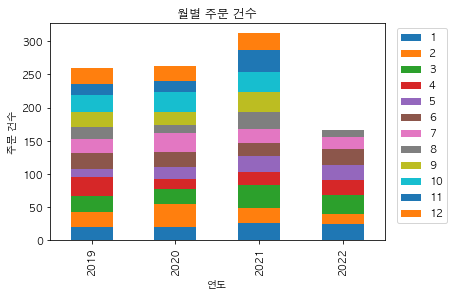

In [174]:
# 날짜 데이터를 연도와 월로 추출
coffee_df['Year'] = coffee_df['Order Date'].dt.year
coffee_df['Month'] = coffee_df['Order Date'].dt.month
monthly_counts = coffee_df.groupby(['Year', 'Month']).size().unstack()

# 월별 막대 그래프
ax = monthly_counts.plot(kind='bar', stacked=True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('월별 주문 건수')
plt.xlabel('연도')
plt.ylabel('주문 건수')
plt.show()

- 주문건수는 2021년이 가장 높은 편

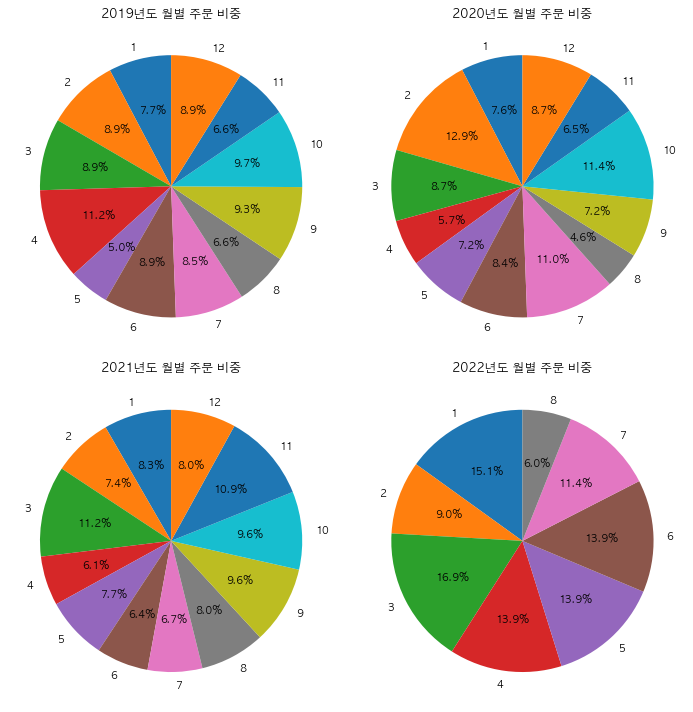

In [175]:
# 년도별 월별 주문 건수 데이터를 계산
year_month_counts = coffee_df.groupby(['Year', 'Month']).size().unstack()
year_month_counts = year_month_counts.fillna(0)

# 파이 차트
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
years = year_month_counts.index

for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]
    data = year_month_counts.loc[year]
    labels = data.index
    data = data[data > 0]
    labels = labels[year_month_counts.loc[year] > 0]
    if len(data) > 0:
        ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{year}년도 월별 주문 비중')

plt.tight_layout()
plt.show()

- 2019년: 4월 비중 높음
- 2020년: 2월, 7월, 10월 비중 높음
- 2021년: 3월, 11월 비중 높음
- 2022년: 3월, 1월 비중 높음
- 월별 비중에서 큰 공통점 발견 X -> 혹시 아니면 계절에 영향을 받을까?

### 4-2. 계절별 주문 비중 시각화

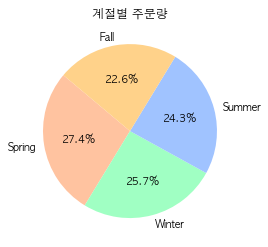

In [176]:
# 계절 매핑
seasons_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

coffee_df['Season'] = coffee_df['Month'].map(seasons_mapping)

# 계절별 주문량 계산
season_counts = coffee_df['Season'].value_counts()

# 계절별 색상 매핑
season_colors = {
    'Winter': '#A0FFC3',
    'Spring': '#FFC3A0',
    'Summer': '#A0C3FF',
    'Fall': '#FFD28A'
}

plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140, colors=[season_colors[season] for season in season_counts.index])
plt.title('계절별 주문량')
plt.show()

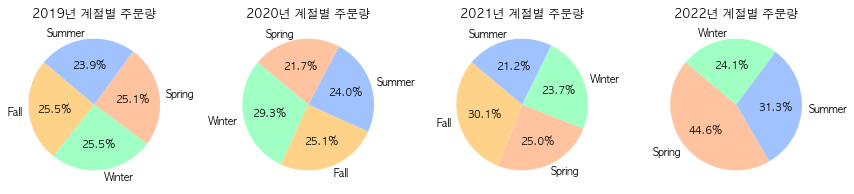

In [177]:
# 년도 계절별 주문량 계산 및 시각화
years = sorted(coffee_df['Order Date'].dt.year.unique())
plt.figure(figsize=(12, 6))

for i, year in enumerate(years, start=1):
    df_year = coffee_df[coffee_df['Order Date'].dt.year == year]
    season_counts = df_year['Season'].value_counts()

    plt.subplot(1, len(years), i)
    plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140, colors=[season_colors[season] for season in season_counts.index])
    plt.title(f'{year}년 계절별 주문량')

plt.tight_layout()
plt.show()


### 4-3. 월별 총 가격, 비중 시각화
- 각 년도에서 어떤 월이 가장 가격이 높을까?

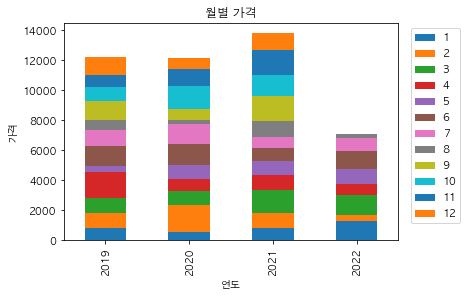

In [178]:
# 각 년도 월별 가격
monthly_price = coffee_df.groupby(['Year', 'Month'])['Total Price'].sum().unstack()
ax = monthly_price.plot(kind='bar', stacked=True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('월별 가격')
plt.xlabel('연도')
plt.ylabel('가격')
plt.show()

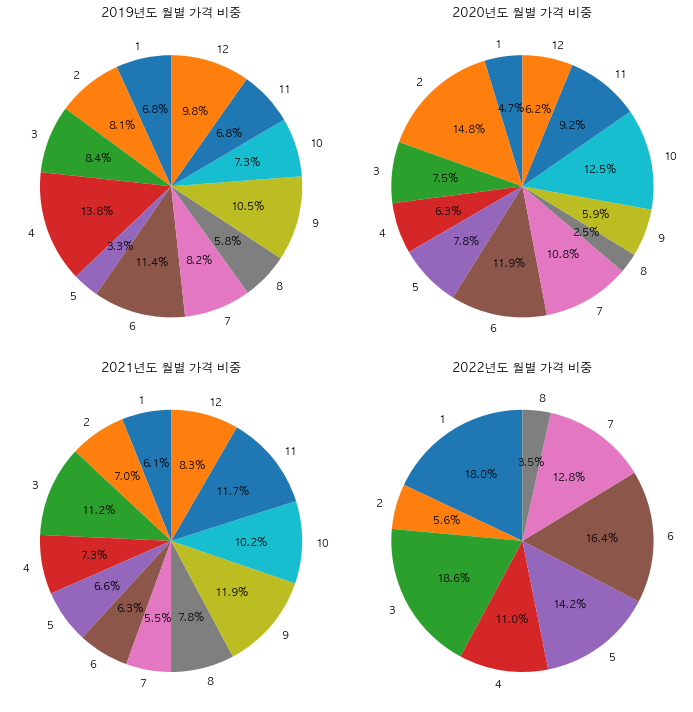

In [179]:
# 각 년도 월별 가격 비중
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
years = monthly_price.index

for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]
    data = monthly_price.loc[year]
    labels = data.index
    data = data[data > 0]
    labels = labels[monthly_price.loc[year] > 0]
    if len(data) > 0:
        ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{year}년도 월별 가격 비중')

plt.tight_layout()
plt.show()

- 2019년 4월, 2020년 2월, 2022년 3월은 다른 월에 비해 월등히 높은 편

### 4-4. 월별 총 이윤, 비중 시각화
- 각 년도에서 어떤 월이 가장 이윤이 높을까?

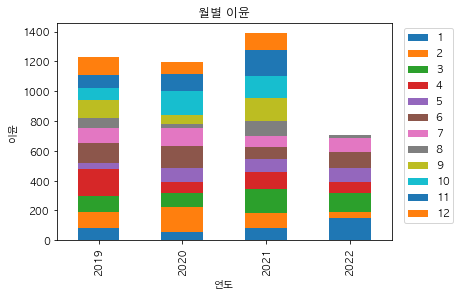

In [180]:
# 각 년도 월별 이윤
monthly_profit = coffee_df.groupby(['Year', 'Month'])['Total Profit'].sum().unstack()
ax = monthly_profit.plot(kind='bar', stacked=True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('월별 이윤')
plt.xlabel('연도')
plt.ylabel('이윤')
plt.show()

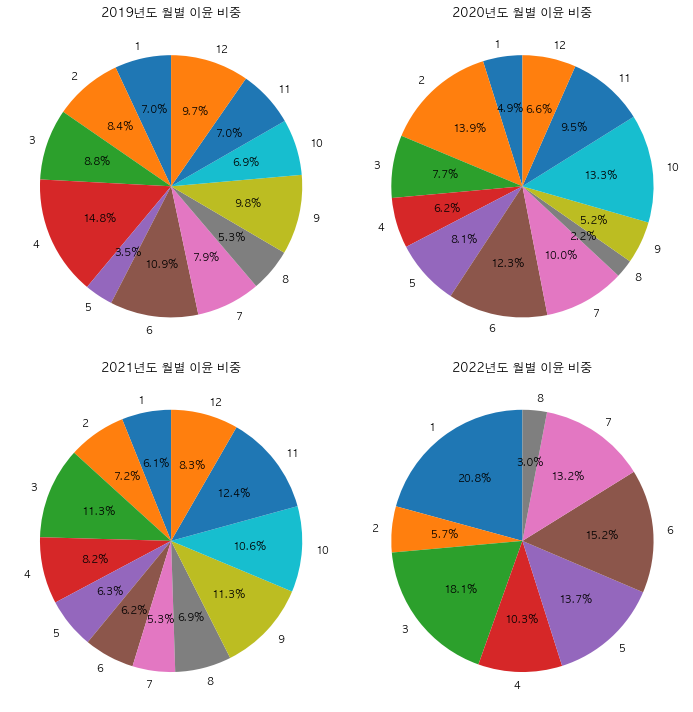

In [181]:
# 각 년도 월별 이윤 비중
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
years = monthly_profit.index

for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]
    data = monthly_profit.loc[year]
    labels = data.index
    data = data[data > 0]
    labels = labels[monthly_profit.loc[year] > 0]
    if len(data) > 0:
        ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{year}년도 월별 이윤 비중')

plt.tight_layout()
plt.show()

- 2019년 4월, 2020년 2월, 2022년 1월은 다른 월에 비해 월등히 높은 편

2022년 주문, 가격과 이윤을 비교했을 때 주문 비중 3월 > 1월, 가격 비중 3월 > 1월, 이윤 비중 1월 > 3월 순
- 3월에 더 많이 팔았지만 이윤은 더 낮음 이유는?

In [182]:
# 1월과 3월 차이 확인 위해 데이터 추출
january_data = coffee_df[(coffee_df['Year'] == 2022) & (coffee_df['Month'] == 1)]
march_data = coffee_df[(coffee_df['Year'] == 2022) & (coffee_df['Month'] == 3)]

In [183]:
january_data['Size'].value_counts()

Size
0.5    9
1.0    7
2.5    6
0.2    3
Name: count, dtype: int64

In [184]:
march_data['Size'].value_counts()

Size
2.5    10
0.2     8
1.0     6
0.5     4
Name: count, dtype: int64

In [185]:
january_data['Coffee Type'].value_counts()

Coffee Type
Lib    9
Exc    6
Rob    5
Ara    5
Name: count, dtype: int64

In [186]:
march_data['Coffee Type'].value_counts()

Coffee Type
Rob    10
Lib     8
Ara     6
Exc     4
Name: count, dtype: int64

- 3월에 이윤이 제일 낮은 사이즈 0.2의 비율이 높다는 것, 이윤이 제일 작았던 커피 원두 종류 Rob의 비율이 높아서라고 추측

### 4-5. 계절별 총가격 비중 시각화

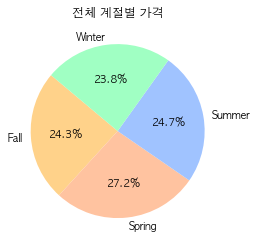

In [187]:
# 계절별 총가격 계산
season_price = coffee_df.groupby('Season')['Total Price'].sum()

plt.pie(season_price, labels=season_price.index, autopct='%1.1f%%', startangle=140, colors=[season_colors[season] for season in season_price.index])
plt.title('전체 계절별 가격')
plt.show()

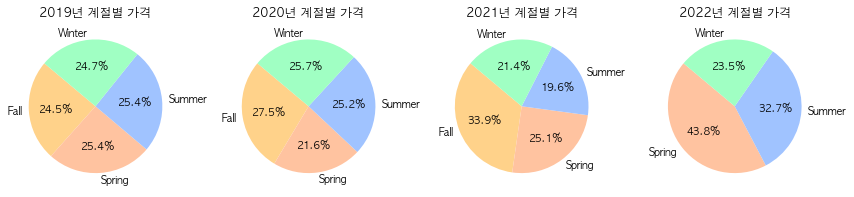

In [188]:
plt.figure(figsize=(12, 6))

for i, year in enumerate(years, start=1):
    df_year = coffee_df[coffee_df['Order Date'].dt.year == year]
    season_price = df_year.groupby('Season')['Total Price'].sum()

    plt.subplot(1, len(years), i)
    plt.pie(season_price, labels=season_price.index, autopct='%1.1f%%', startangle=140, colors=[season_colors[season] for season in season_price.index])
    plt.title(f'{year}년 계절별 가격')

plt.tight_layout()
plt.show()

### 4-6. 계절별 총이윤 비중 시각화

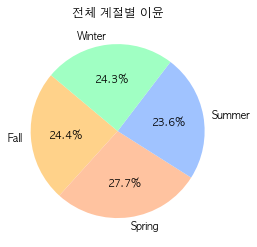

In [189]:
# 계절별 총이윤 계산
season_profits = coffee_df.groupby('Season')['Total Profit'].sum()

plt.pie(season_profits, labels=season_profits.index, autopct='%1.1f%%', startangle=140, colors=[season_colors[season] for season in season_profits.index])
plt.title('전체 계절별 이윤')
plt.show()

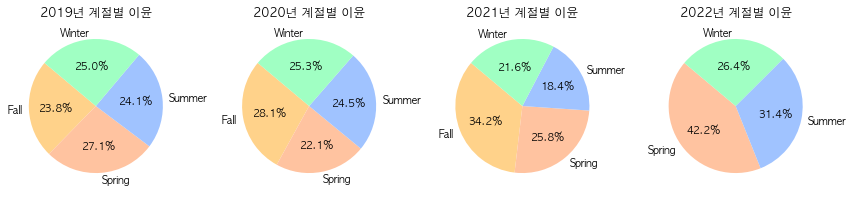

In [190]:
plt.figure(figsize=(12, 6))

for i, year in enumerate(years, start=1):
    df_year = coffee_df[coffee_df['Order Date'].dt.year == year]
    season_profits = df_year.groupby('Season')['Total Profit'].sum()

    plt.subplot(1, len(years), i)
    plt.pie(season_profits, labels=season_profits.index, autopct='%1.1f%%', startangle=140, colors=[season_colors[season] for season in season_profits.index])
    plt.title(f'{year}년 계절별 이윤')

plt.tight_layout()
plt.show()

계절별 주문량 비중 비교
- 전체 데이터로 비교 했을 때는 봄 > 겨울 > 여름 > 가을

- 2019년 : 가을 = 겨울 > 봄 > 여름
- 2020년 : 겨울 > 가을 > 여름 > 봄
- 2021년 : 가을 > 봄 > 겨울 > 여름
- 2022년 : 봄 > 여름 > 겨울

계절별 가격 비중 비교
- 전체 데이터로 비교 했을 때는 봄 > 여름 > 가을 > 겨울

- 2019년 : 봄 = 여름 > 겨울 > 가을
- 2020년 : 가을 > 겨울 > 여름 > 봄
- 2021년 : 가을 > 봄 > 겨울 > 여름
- 2022년 : 봄 > 여름 > 겨울

계절별 이윤 비중 비교
- 전체 데이터로 비교 했을 때는 봄 > 가을 = 겨울 > 여름

- 2019년 : 봄 > 겨울 > 여름 > 가을
- 2020년 : 가을 > 겨울 > 여름 > 봄
- 2021년 : 가을 > 봄 > 겨울 > 여름
- 2022년 : 봄 > 여름 > 겨울

- 결과 해석
    - 전체 데이터 비교 : 가을은 주문 수에 비해 비싼 금액의 커피를 많이 찾는다는 뜻, 여름에는 싼 값의 커피를 많이 판매
    - 2019년 : 가을에는 비교적 싼 값의 커피가 많이 팔림
    - 2020년 : 가을에는 비교적 비싼 커피가 많이 팔렸고 겨울에는 비교적 싼 커피가 많이 팔림

### 4-7. 국가별 Loyalty Card 유무 확인

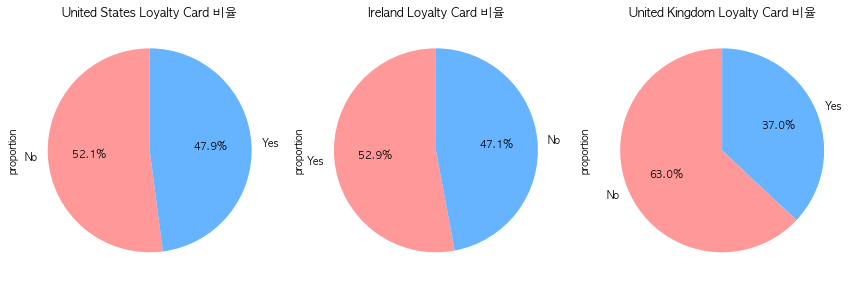

In [191]:
countries = coffee_df['Country'].unique()
num_countries = len(countries)

plt.figure(figsize=(12, 6))

for i, country in enumerate(countries, start=1):
    plt.subplot(1, num_countries, i)
    country_data = coffee_df[coffee_df['Country'] == country]
    loyalty_card_counts = country_data['Loyalty Card'].value_counts(normalize=True)
    colors = ['#ff9999', '#66b3ff']
    
    loyalty_card_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'{country} Loyalty Card 비율')

plt.tight_layout()
plt.show()

- 대부분 나라의 절반 이상이 Loyalty Card 가지고 있지 않음
- 그 중에서도 영국의 No 비율이 가장 높은 편

### 4-8. 국가별 Coffee Type 비율

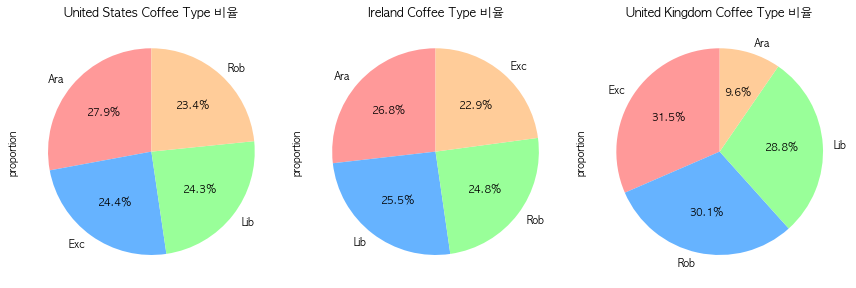

In [192]:
coffee_types = coffee_df['Coffee Type'].unique()
num_coffee_types = len(coffee_types)

plt.figure(figsize=(12, 6))

for i, country in enumerate(countries, start=1):
    plt.subplot(1, num_countries, i)
    country_data = coffee_df[coffee_df['Country'] == country]
    coffee_type_counts = country_data['Coffee Type'].value_counts(normalize=True)
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    
    coffee_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'{country} Coffee Type 비율')

plt.tight_layout()
plt.show()

- 아일랜드와 미국은 Coffee Type 종류 비율이 비슷한 편
- 영국은 Ara는 다른 종류에 비해 비중 적음

### 4-9. 국가별 Roast Type 비율

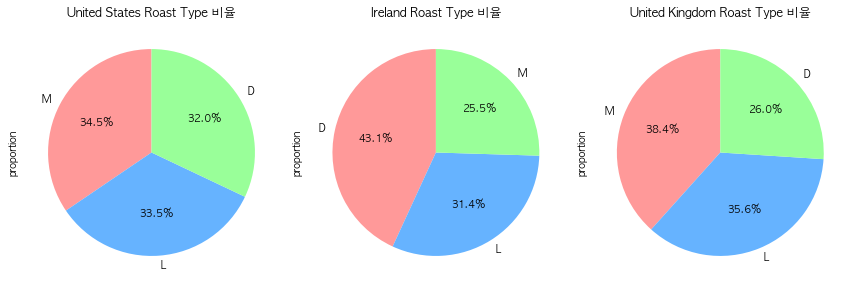

In [193]:
plt.figure(figsize=(12, 6))

for i, country in enumerate(countries, start=1):
    plt.subplot(1, num_countries, i)
    country_data = coffee_df[coffee_df['Country'] == country]
    roast_type_counts = country_data['Roast Type'].value_counts(normalize=True)
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    
    roast_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'{country} Roast Type 비율')

plt.tight_layout()
plt.show()

- 아일랜드에서는 Dark 비율 높은 편 => 아일랜드인들은 진한 로스트의 커피를 선호
- 영국에서는 Dark 비율이 적은 편 => 영국인들은 덜 진한 로스트의 커피를 선호

### 4-10. 국가별 Size 비율

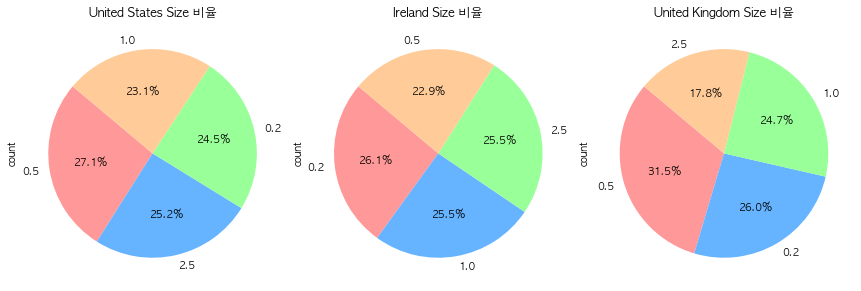

In [194]:
plt.figure(figsize=(16, 16))

for i, country in enumerate(countries, 1):
    plt.subplot(4, 4, i)
    country_df = coffee_df[coffee_df['Country'] == country]
    size_counts = country_df['Size'].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    
    size_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'{country} Size 비율')

plt.tight_layout()
plt.show()

- 영국의 size 0.5 비율 높은 편 => 영국인들은 작은 사이즈 커피를 선호

In [195]:
coffee_df

,Order ID,Order Date,Customer ID,Product ID,Quantity,City,Country,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Total Price,Total Profit,Year,Month,Season
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Paterson,United States,Yes,Rob,M,1.0,9.950,0.9950,0.59700,19.900,1.19400,2019,9,Fall
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Paterson,United States,Yes,Exc,M,0.5,8.250,1.6500,0.90750,41.250,4.53750,2019,9,Fall
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,San Antonio,United States,Yes,Ara,L,1.0,12.950,1.2950,1.16550,12.950,1.16550,2021,6,Summer
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Cill Airne,Ireland,No,Exc,M,1.0,13.750,1.3750,1.51250,27.500,3.02500,2021,7,Summer
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Cill Airne,Ireland,No,Rob,L,2.5,27.485,1.0994,1.64910,54.970,3.29820,2021,7,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,Dallas,United States,No,Rob,L,2.5,27.485,1.0994,1.64910,27.485,1.64910,2020,1,Winter
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,Fort Smith,United States,No,Rob,M,0.5,5.970,1.1940,0.35820,29.850,1.79100,2022,5,Spring
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,Fort Smith,United States,No,Ara,M,0.5,6.750,1.3500,0.60750,27.000,2.43000,2019,10,Fall
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,Whittier,United States,No,Ara,D,1.0,9.950,0.9950,0.89550,9.950,0.89550,2021,8,Summer


## 5. 데이터 전처리

### 5-1. 의미없는 컬럼 삭제

In [196]:
# 분석에 의미 없는 컬럼 삭제
coffee_df.drop(['Customer ID', 'Product ID', 'City', 'Season'], axis=1, inplace=True)

### 5-2. Encoding 수행

In [197]:
# Loyalty Card Encoding

Loyalty_Card = {
    'No' : 0,
    'Yes' : 1
}

coffee_df['Loyalty Card'] = coffee_df['Loyalty Card'].map(Loyalty_Card)
coffee_df['Loyalty Card'].value_counts()

Loyalty Card
0    521
1    479
Name: count, dtype: int64

In [198]:
# Coffee Type Encoding

Coffee_Type = {
    'Rob' : 0,
    'Ara' : 1,
    'Exc' : 2,
    'Lib' : 3
}
coffee_df['Coffee Type'] = coffee_df['Coffee Type'].map(Coffee_Type)
coffee_df['Coffee Type'].value_counts()

Coffee Type
1    264
3    248
2    247
0    241
Name: count, dtype: int64

In [199]:
# Roast Type Encoding

Roast_Type = {
    'D' : 0,
    'M' : 1,
    'L' : 2
}
coffee_df['Roast Type'] = coffee_df['Roast Type'].map(Roast_Type)
coffee_df['Roast Type'].value_counts()

Roast Type
1    334
2    333
0    333
Name: count, dtype: int64

In [200]:
# Country Encoding

Country = {
    'United Kingdom' : 0,
    'Ireland' : 1,
    'United States' : 2
}
coffee_df['Country'] = coffee_df['Country'].map(Country)
coffee_df['Country'].value_counts()

Country
2    774
1    153
0     73
Name: count, dtype: int64

### 5-3. Loyalty Card 카드 여부에 대한 통계 검정
- 귀무 가설 (H0): 로얄티 카드 소유자와 비소유자 간의 평균 차이가 없다.
- 대립 가설 (H1): 로얄티 카드 소유자와 비소유자 간의 평균 차이가 있다.
- 범주형 변수 : 카이제곱, 연속형 변수 : t-검정

In [242]:
# 카이제곱
# 로열티 카드 데이터 분리
loyalty_card = coffee_df[coffee_df['Loyalty Card'] == 1]
non_loyalty_card = coffee_df[coffee_df['Loyalty Card'] == 0]

columns = ['Quantity', 'Country', 'Coffee Type', 'Roast Type', 'Size']

for column in columns:
    contingency_table = pd.crosstab(coffee_df['Loyalty Card'], coffee_df[column])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"{column}:")
    print(f"Chi-Squared : {round(chi2, 2)}")
    print(f"P-value: {round(p, 2)}")

    if p < 0.05:
        print("통계적으로 유의미한 차이가 있다.")
    else:
        print("통계적으로 유의미한 차이가 없다.")
    print()

Quantity:
Chi-Squared : 3.67
P-value: 0.6
통계적으로 유의미한 차이가 없다.

Country:
Chi-Squared : 5.04
P-value: 0.08
통계적으로 유의미한 차이가 없다.

Coffee Type:
Chi-Squared : 5.7
P-value: 0.13
통계적으로 유의미한 차이가 없다.

Roast Type:
Chi-Squared : 4.09
P-value: 0.13
통계적으로 유의미한 차이가 없다.

Size:
Chi-Squared : 14.5
P-value: 0.0
통계적으로 유의미한 차이가 있다.



- Size 컬럼
- Chi-Squared : 14.5, P-value: 0.0
- 로열티 카드 여부에 따라 커피 사이즈의 선택에 차이가 있다.

In [244]:
# t-검정
columns = ['Unit Price', 'Price per 100g', 'Profit', 'Total Price', 'Total Profit']

for column in columns:
    t_stat, p_value = ttest_ind(loyalty_card[column], non_loyalty_card[column])

    print(f"{column}:")
    print(f"t-통계량: {round(t_stat, 2)}")
    print(f"P-값: {round(p_value, 2)}")

    if p_value < 0.05:
        print("통계적으로 유의미한 차이가 있다.")
    else:
        print("통계적으로 유의미한 차이가 없다.")

    print()

Unit Price:
t-통계량: -0.21
P-값: 0.83
통계적으로 유의미한 차이가 없다.

Price per 100g:
t-통계량: 0.62
P-값: 0.53
통계적으로 유의미한 차이가 없다.

Profit:
t-통계량: -0.41
P-값: 0.68
통계적으로 유의미한 차이가 없다.

Total Price:
t-통계량: -1.05
P-값: 0.29
통계적으로 유의미한 차이가 없다.

Total Profit:
t-통계량: -1.03
P-값: 0.31
통계적으로 유의미한 차이가 없다.



## 6. 정리

- 커피 타입 가격 : Lib > Exc > Ara > Rob
- 로스트 타입 가격 : L > M > D

- 가격, 이윤이 가장 높았던 커피 종류 -> L-L-2.5 : (Lib(커피종류) - Low(로스트 타입) - 2.5(사이즈))
- 가격, 이윤이 가장 낮았던 커피 종류 -> R-D-0.2 : (Rob(커피종류) - Dark(로스트 타입) - 0.2(사이즈))
- 100g당 가격이 가장 높았던 커피 종류 -> L-L-0.2 : (Lib(커피종류) - Low(로스트 타입) - 0.2(사이즈))
- 100g당 가격이 가장 낮았던 커피 종류 -> R-D-2.5 : (Rob(커피종류) - Dark(로스트 타입) - 2.5(사이즈))

- 계절별 비교: 가을에는 비싼 커피를 많이 찾고, 여름에는 상대적으로 저렴한 커피를 더 많이 찾음.
- 연도별 비교: 2019년 가을에는 비교적 저렴한 커피가 많이 팔렸으며, 2020년 가을에는 비교적 비싼 커피가 많이 팔렸고 겨울에는 비교적 저렴한 커피가 더 많이 팔림
- 로열티 카드 비율: 대부분의 나라에서 절반 이상의 고객이 로열티 카드를 가지고 있지 않지만, 특히 영국에서 로열티 카드 비율이 낮음
- 로스트 타입 비교: 아일랜드에서는 Dark 로스트 타입의 비율이 높고, 영국에서는 Dark 로스트 타입의 비율이 낮음
- 로열티 카드 여부에 따라 커피 사이즈 선택에 차이가 있다.